# <center> IRIS DATASET<center>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = sns.load_dataset('iris')
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


<img src="iris_petal_sepal.png" >

In [3]:
df.shape

(150, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [7]:
sns.set(rc={'figure.figsize':(9,6)})

<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

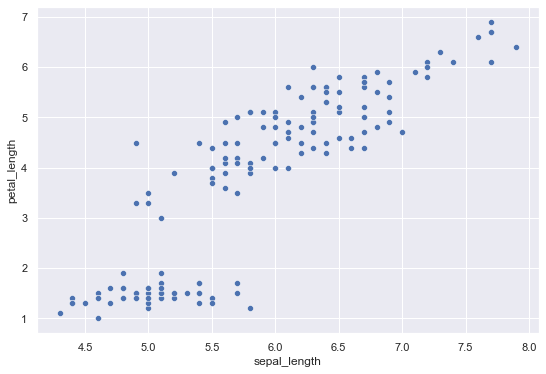

In [8]:
sns.scatterplot(x=df.sepal_length, y=df.petal_length)

<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

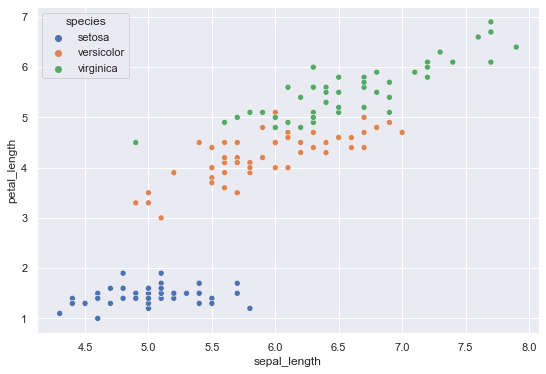

In [9]:
sns.scatterplot(x=df.sepal_length, y=df.petal_length, hue=df.species)

<AxesSubplot:xlabel='sepal_width', ylabel='petal_width'>

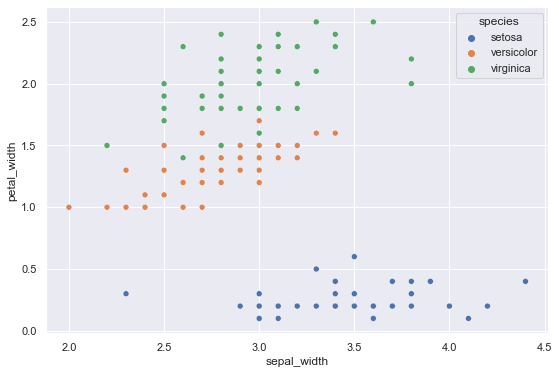

In [10]:
sns.scatterplot(x=df.sepal_width, y=df.petal_width, hue=df.species)

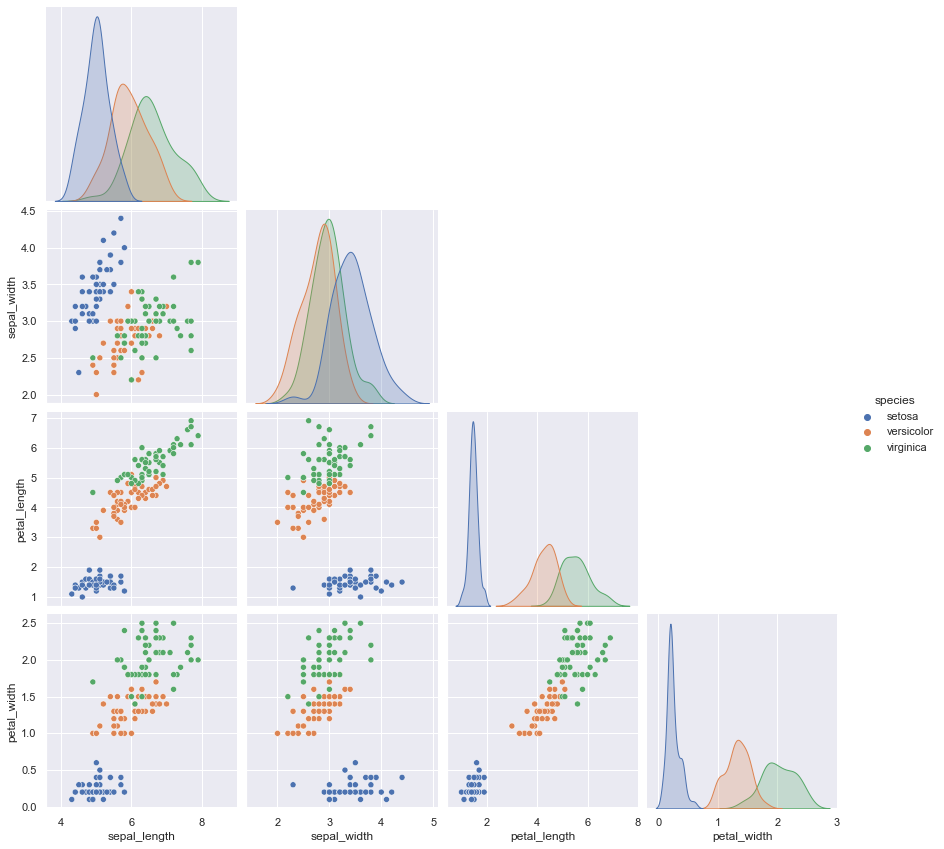

In [11]:
sns.pairplot(df, hue='species', height=3,aspect=1, corner=True)

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

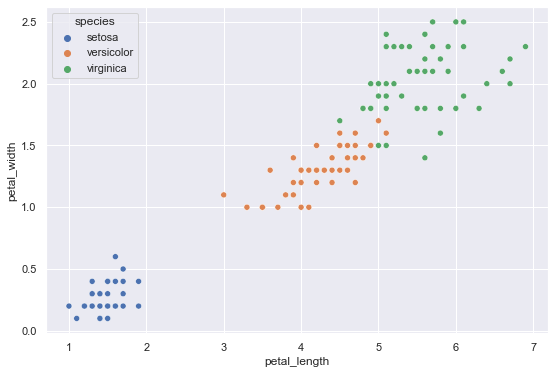

In [12]:
sns.scatterplot(x=df.petal_length, y=df.petal_width, hue=df.species)

<AxesSubplot:>

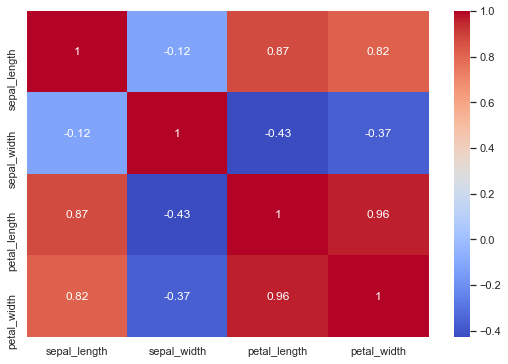

In [27]:
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')

In [111]:
from sklearn.model_selection import train_test_split
xtrn,xtest,ytrn,ytest = train_test_split(df.drop(columns=['species']), df.species, test_size=0.3, random_state=12)

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [113]:
def perform_trn(algo):
    model = algo.fit(xtrn,ytrn)
    pred = model.predict(xtest)
    return accuracy_score(ytest,pred)

In [114]:
lr = perform_trn(LogisticRegression(penalty='l1', solver='liblinear'))
svm = perform_trn(SVC())
#knn = perform_trn(KNeighborsClassifier())
dt = perform_trn(DecisionTreeClassifier())

In [115]:
algo_name = pd.DataFrame(['lr','svm','dt'], columns=['Algorithm'])
score = pd.DataFrame([lr,svm,dt], columns=['Accuracy_score'])

In [116]:
ans = pd.concat([algo_name, score], axis=1)
ans

,Algorithm,Accuracy_score
0,lr,0.977778
1,svm,0.977778
2,dt,0.977778
